In [1]:
import numpy as np
import gzip
from sklearn.model_selection import train_test_split as tts


uspsTrain = np.genfromtxt('C:\\Users\\Dan Adamov\\Desktop\\RHUL\\3rd Year\\Individual Project\\zip.train\\zip.train', delimiter = " ", autostrip = True)
uspsTest = np.genfromtxt('C:\\Users\\Dan Adamov\\Desktop\\RHUL\\3rd Year\\Individual Project\\zip.test\\zip.test', delimiter = " ", autostrip = True)
usps = np.concatenate((uspsTrain, uspsTest))
X_trainUsps, X_testUsps, y_trainUsps, y_testUsps = tts(usps[:,1:], usps[:, 0], test_size=0.125, random_state=709)
#Dowloaded USPS dataset into train and test datasets(ratio 7:1 respectively) and have separate arrays for features and their corresponding labels

X_trainMnist = np.array([])
y_trainMnist = np.array([])
X_testMnist = np.array([])
y_testMnist = np.array([])
with gzip.open('C:\\Users\\Dan Adamov\\Desktop\\RHUL\\3rd Year\\Individual Project\\train-images-idx3-ubyte.gz', 'rb') as trainSampleFile:
    trainSampleBuffer = trainSampleFile.read()
    X_trainMnistUnshaped = np.frombuffer(trainSampleBuffer, dtype = np.uint8, offset = 16)
    X_trainMnist = X_trainMnistUnshaped.reshape(60000, 784)
with gzip.open('C:\\Users\\Dan Adamov\\Desktop\\RHUL\\3rd Year\\Individual Project\\train-labels-idx1-ubyte.gz', 'rb') as trainLabelFile:
    trainLabelBuffer = trainLabelFile.read()
    y_trainMnist = np.frombuffer(trainLabelBuffer, dtype = np.uint8, offset = 8)
with gzip.open('C:\\Users\\Dan Adamov\\Desktop\\RHUL\\3rd Year\\Individual Project\\t10k-images-idx3-ubyte.gz', 'rb') as testSampleFile:
    testSampleBuffer = testSampleFile.read()
    X_testMnistUnshaped = np.frombuffer(testSampleBuffer, dtype = np.uint8, offset = 16)
    X_testMnist = X_testMnistUnshaped.reshape(10000, 784)
with gzip.open('C:\\Users\\Dan Adamov\\Desktop\\RHUL\\3rd Year\\Individual Project\\t10k-labels-idx1-ubyte.gz', 'rb') as testLabelFile:
    testLabelBuffer = testLabelFile.read()
    y_testMnist = np.frombuffer(testLabelBuffer, dtype = np.uint8, offset = 8)
# Dowloaded Mnist dataset into train and test datasets(ratio 6:1 respectively) and have separate arrays for features and their corresponding labels


def neighArray(X_testSample, X_train, y_train, neighNumb):
    nearDist = {} # dictionary with key as X_train index and value as Eucledian distance
    for i in range(X_train.shape[0]):
        eucSum = np.linalg.norm(X_train[i,:] - X_testSample)
        if len([*nearDist]) < neighNumb: # when nearDist is empty we fill it up with first elements just to make it full
            nearDist[i] = eucSum
        else:
            maxDistKeyVal = max(nearDist, key=nearDist.get), max(nearDist.values())
            if eucSum < maxDistKeyVal[1]:
                del nearDist[maxDistKeyVal[0]]
                nearDist[i] = eucSum
    return [*nearDist]

def knnClassifier(X_testSample, X_train, y_train, neighNumb):
    nearDist = neighArray(X_testSample, X_train, y_train, neighNumb)
    knnLabelVote = {} #building a dictionary for each label (key) incrementing by +1 its value when nearest neighbour has a given label
    for indX in nearDist:
        label = y_train[indX]
        if label in [*knnLabelVote]:
            knnLabelVote[label] += 1
        else:
            knnLabelVote[label] = 1
    predictedLabel = max(knnLabelVote, key = knnLabelVote.get)
    return predictedLabel

def knnRegressor(X_testSample, X_train, y_train, neighNumb):
    nearDist = neighArray(X_testSample, X_train, y_train, neighNumb)
    knnLabelSum = 0
    for indX in nearDist:
        knnLabelSum += y_train[indX]
    return knnLabelSum / len(nearDist)

def errorRate(X_testPredicted, y_test):
    totalErrors = 0
    for t in range( len(X_testPredicted) - 1 ):
        if X_testPredicted[t] != y_test[t]:
            totalErrors += 1
    return totalErrors/len(X_testPredicted)

def errorRateWrapper(X_train, X_test, y_train, y_test, neighNumb):
    predictions = []
    for testSample in X_test:
        predictions.append( knnClassifier(testSample, X_train, y_train, neighNumb) )
    curErrorRate = errorRate(predictions, y_test)
    return curErrorRate

def errorRateDifNeighWrapper(X_train, X_test, y_train, y_test, neighNumbRange):
    for r in range(1, neighNumbRange + 1):
        print("For", r , "nearest neighbours in KNN the error rate is:", errorRateWrapper(X_train, X_test, y_train, y_test, r))

In [6]:
errorRateDifNeighWrapper(X_trainUsps, X_testUsps, y_trainUsps, y_testUsps, 10)

For 1 nearest neighbours in KNN the error rate is: 0.03009458297506449
For 2 nearest neighbours in KNN the error rate is: 0.03697334479793637
For 3 nearest neighbours in KNN the error rate is: 0.034393809114359415
For 4 nearest neighbours in KNN the error rate is: 0.037833190025795355
For 5 nearest neighbours in KNN the error rate is: 0.03955288048151333
For 6 nearest neighbours in KNN the error rate is: 0.040412725709372314
For 7 nearest neighbours in KNN the error rate is: 0.03955288048151333
For 8 nearest neighbours in KNN the error rate is: 0.04471195184866724
For 9 nearest neighbours in KNN the error rate is: 0.04471195184866724
For 10 nearest neighbours in KNN the error rate is: 0.043852106620808254


In [7]:
errorRateDifNeighWrapper(X_trainMnist, X_testMnist, y_trainMnist, y_testMnist, 10)

For 1 nearest neighbours in KNN the error rate is: 0.4948
For 2 nearest neighbours in KNN the error rate is: 0.5426
For 3 nearest neighbours in KNN the error rate is: 0.5542
For 4 nearest neighbours in KNN the error rate is: 0.5756
For 5 nearest neighbours in KNN the error rate is: 0.5888
For 6 nearest neighbours in KNN the error rate is: 0.5995
For 7 nearest neighbours in KNN the error rate is: 0.6109
For 8 nearest neighbours in KNN the error rate is: 0.6175
For 9 nearest neighbours in KNN the error rate is: 0.6315
For 10 nearest neighbours in KNN the error rate is: 0.638


Program Prediction: 2.0
Actual Label: 2.0


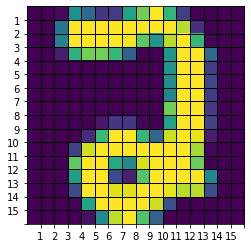

In [40]:
from PIL import Image
import matplotlib.pyplot as plt

for k in range(7, len(X_testUsps)):
    knnC = knnClassifier(X_testUsps[k], X_trainUsps, y_trainUsps, 1)
    #if knnC != y_testUsps[k]:
        # plt.pcolormesh((X_testUsps[k,:]*127.5+128).astype(int).reshape(16,16), edgecolors='k', linewidth=2)
    plt.imshow((X_testUsps[k,:]*127.5+128).astype(int).reshape(16,16))
    ax = plt.gca();
    ax.grid(color='k', linestyle='-', linewidth=1)
    ax.set_xticks(np.arange(0.5, 16, 1))
    ax.set_yticks(np.arange(0.5, 16, 1))
    ax.set_xticklabels(np.arange(1, 16, 1))
    ax.set_yticklabels(np.arange(1, 16, 1))
    print("Program Prediction:", knnC)
    print("Actual Label:", y_testUsps[k])
    break

prediction: 1
label: 2 n: 1


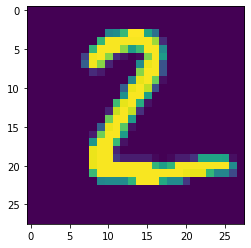

In [6]:
for k in range(0, len(X_testMnist)):
    knnC = knnClassifier(X_testMnist[k], X_trainMnist, y_trainMnist, 1)
    if knnC != y_testMnist[k]:
        plt.imshow((X_testMnist[k,:]).astype(int).reshape(28,28))
        print("prediction:", knnC)
        print("label:", y_testMnist[k], "n:", k)
        break

In [5]:
import pickle as pkl
import numpy as np
a = np.array([0,1,2,3,3,5,6,7,8,9])
pkl.dump(a, open("a.pkl", "wb"))